In [15]:
from lambeq import BobcatParser

sentence = 'Alice loves bob.'

# Get a string diagram
parser = BobcatParser(verbose='text')
diagram = parser.sentence2diagram(sentence)

Diagram(dom=Ty(), cod=Ty(qubit), layers=[Layer(left=Ty(), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[Rx(Alice__n_0); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[Rz(Alice__n_1); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[Rx(Alice__n_2); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit @ qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit)), Layer(left=Ty(qubit @ qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty(qubit)), Layer(left=Ty(qubit @ qubit @ qubit), box=[H; Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit), box=[CRz(loves__n.r@s@n.l_0); Ty(qubit @ qubit) -> Ty(qubit @ qubit)], right=Ty(qubit)), Layer(left=Ty(qubit @ qubit), box=[CRz(loves__n.r@s@n.l_1); Ty(qubit @ qubit) -> Ty(qubit @ qubit)], ri

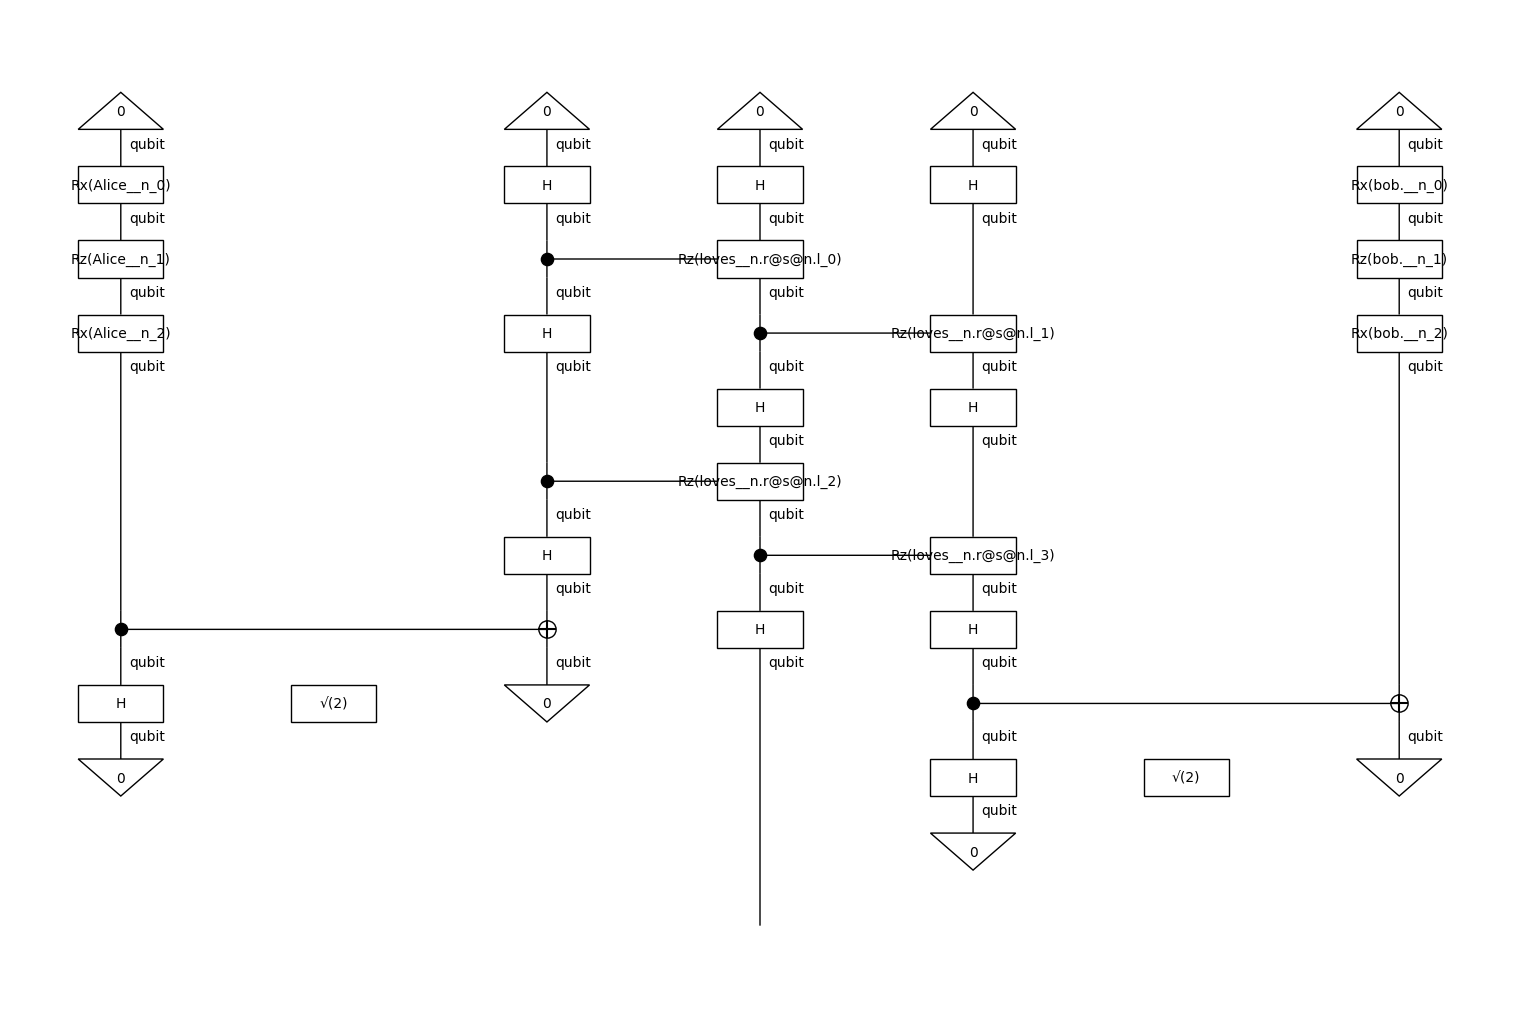

Diagram(dom=Ty(), cod=Ty(qubit), layers=[Layer(left=Ty(), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[Rz(Alice__n_0); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[Ry(Alice__n_1); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(), box=[Rz(Alice__n_2); Ty(qubit) -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit @ qubit @ qubit), box=[0; Ty() -> Ty(qubit)], right=Ty()), Layer(left=Ty(qubit), box=[Rz(loves__n.r@s@n.l_0); Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit)), Layer(left=Ty(qubit), box=[Ry(loves__n.r@s@n.l_1); Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit)), Layer(left=Ty(qubit), box=[Rz(loves__n.r@s@n.l_2); Ty(qubit) -> Ty(qubit)], right=Ty(qubit @ qubit)), Layer(left=Ty(qubit @ qubit), box=[Rz(loves__n.r@s@n.l_3); Ty(qubit) -> Ty(qubit)], right=Ty(qubit)), Layer(left=Ty(qubit @ qubit), box=[Ry(loves__n.r@s@n

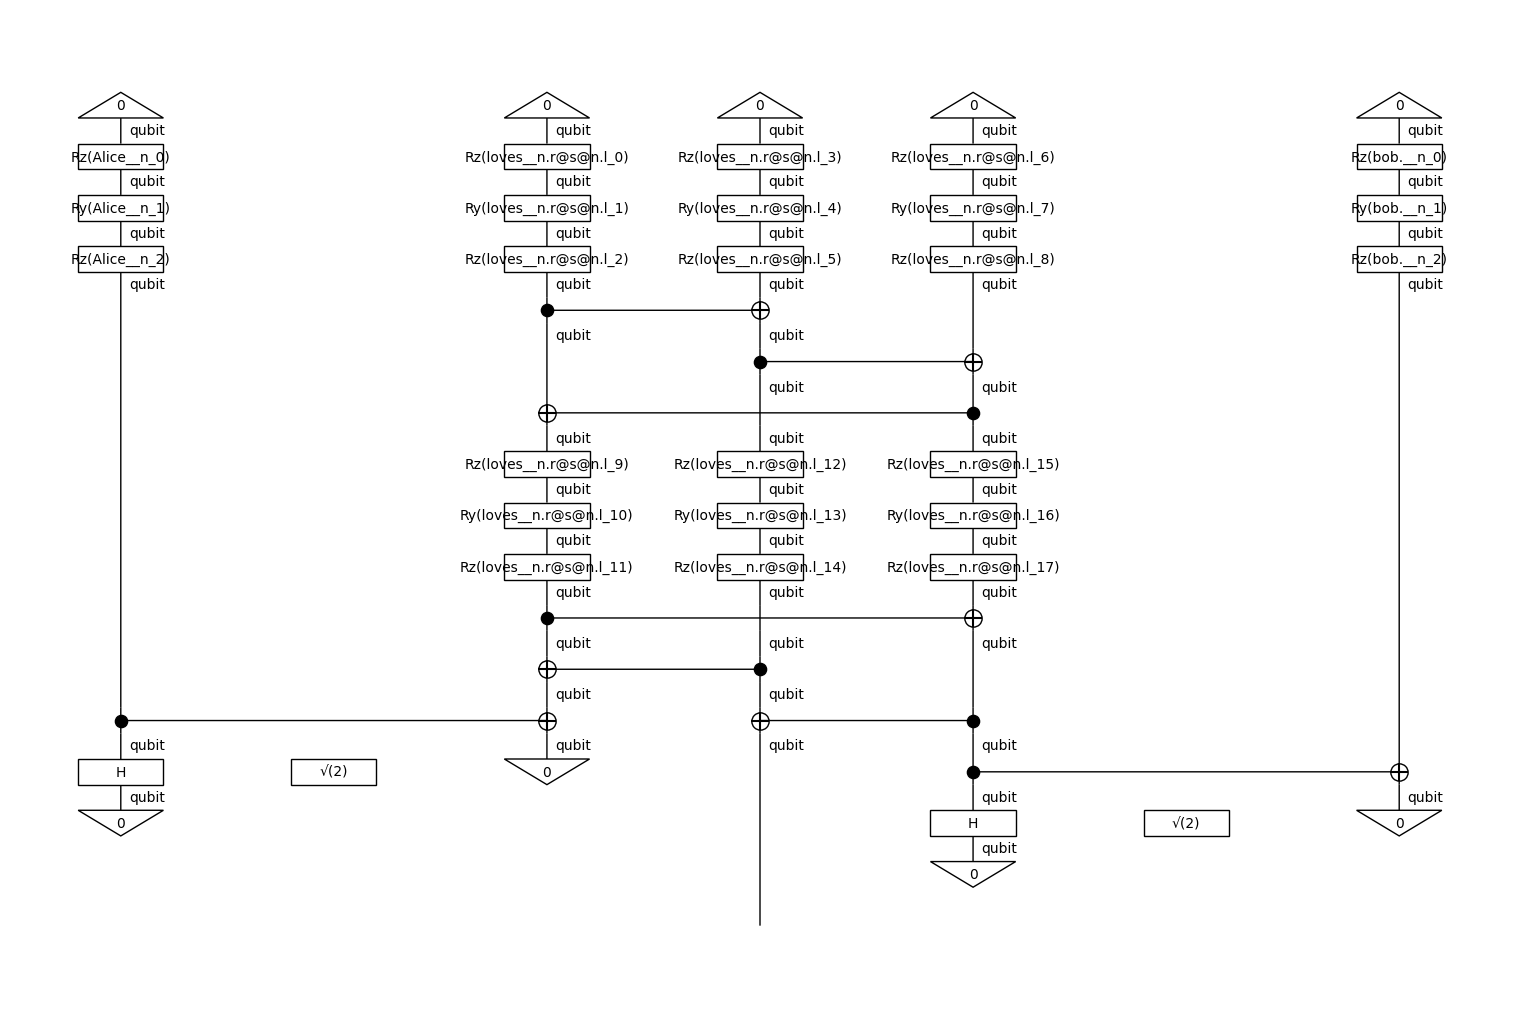

In [16]:
from lambeq import AtomicType, IQPAnsatz,StronglyEntanglingAnsatz

# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Convert string diagram to quantum circuit
ansatz1 = IQPAnsatz({N: 1, S: 1}, n_layers=2)
ansatz2 = StronglyEntanglingAnsatz({N: 1, S: 1}, n_layers=2)

circuit1 = ansatz1(diagram)
print(circuit1)
circuit1.draw(figsize=(15,10))

circuit2 = ansatz2(diagram)
print(circuit2)
circuit2.draw(figsize=(15,10))


In [17]:

from pytket.circuit.display import render_circuit_jupyter

tket_circuit = circuit.to_tk()

render_circuit_jupyter(tket_circuit)


In [18]:
from pytket.extensions.qiskit import tk_to_qiskit

qiskit_circuit = tk_to_qiskit(tket_circuit)